# Our first model

In [1]:
import pandas as pd 
import numpy as np

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler

## Train-test-split for time series

In [4]:
df = pd.read_csv("../raw_data/data/merged_data_prescaling.csv")

In [11]:
df.head(2)

,bdi,cgdp,csteel,CIP
time,,,,
1995-01-23,1983.0,5.890383e+11,7.349355e+06,14.721669
1995-01-30,1959.0,5.923030e+11,7.317968e+06,15.351956


In [ ]:
df.set_index("time", inplace=True)

In [9]:
df.drop(columns="Unnamed: 0", inplace=True)

In [10]:
df.head(2)

,bdi,cgdp,csteel,CIP
time,,,,
1995-01-23,1983.0,5.890383e+11,7.349355e+06,14.721669
1995-01-30,1959.0,5.923030e+11,7.317968e+06,15.351956


## TimeseriesGenerator

In [15]:
folds = TimeSeriesSplit(n_splits=5)

train_data = []
test_data = list()

for i, (train_index, test_index) in enumerate(folds.split(df)):
    train_data.append(df.iloc[train_index])
    test_data.append(df.iloc[test_index])


In [19]:
train_data[2].head(2)

,bdi,cgdp,csteel,CIP
time,,,,
1995-01-23,1983.0,5.890383e+11,7.349355e+06,14.721669
1995-01-30,1959.0,5.923030e+11,7.317968e+06,15.351956


In [21]:
len(test_data[2])

231

In [20]:
test_data[2].head(2)

,bdi,cgdp,csteel,CIP
time,,,,
2008-07-07,9230.0,4.175011e+12,4.461429e+07,14.319898
2008-07-14,9012.0,4.194977e+12,4.413513e+07,13.857131


In [61]:
# X_train_list = []
# y_train_list = []
data_gen_list = []
scaler = StandardScaler()
for i in range(5):
    X = train_data[i]

    X_scaled = scaler.fit_transform(train_data[i])
    y = train_data[i]["bdi"]
    data_gen = TimeseriesGenerator(data=X_scaled, targets=y, length=8)
#     X_train_list.append(X)
#     y_train_list.append(y_train_list)
    data_gen_list.append(data_gen)


In [63]:
#Creating validation_data:
data_gen_val_list = []

for i in range(5):
    X = test_data[i]
    X_test_scaled = scaler.fit_transform(train_data[i])
    y = test_data[i]["bdi"]
    data_gen_val = TimeseriesGenerator(data=X, targets=y, length=8)
#     X_train_list.append(X)
#     y_train_list.append(y_train_list)
    data_gen_val_list.append(data_gen_val)


In [64]:
len(data_gen_val_list[4])

2

In [65]:
len(data_gen_list[4])

9

In [66]:
for X, y in data_gen_list[4]:
    print(X.shape, y.shape)
    print(X[0], y[0])
    break 

(128, 8, 4) (128,)
[[-0.11731886 -1.00297078 -1.21578292  0.64011201]
 [-0.12944381 -1.00208165 -1.21715275  0.79115383]
 [-0.11883448 -1.00119251 -1.21276678  0.90161418]
 [-0.11277201 -1.00030337 -1.2060785   0.97661012]
 [-0.0950898  -0.99941424 -1.19939022  1.02125872]
 [-0.07538676 -0.9985251  -1.19270193  1.04067702]
 [-0.01981409 -0.99763597 -1.1883132   1.039378  ]
 [ 0.02565445 -0.99674683 -1.18484429  1.01593989]] 2289.0


## Defining our model

In [77]:
def init_model():
    
    model = Sequential()
    
    #Standard Scale (z-score) the inputs.
    
    #LSTM layers
    model.add(layers.LSTM(30, activation="tanh", input_shape=(8,4), return_sequences=True))
    model.add(layers.LSTM(30, activation="tanh", return_sequences=False))
    #Dense layers
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation="linear"))
    

    model.compile(loss="mse", optimizer="adam", metrics="mae")
    
    return model

In [78]:
model = init_model()

##  Training the model

In [79]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [80]:
history = model.fit(data_gen_list[4], epochs=1000, validation_data=data_gen_val_list[4], shuffle=False)

Epoch 1/1000
9/9 [==============================] - 3s 72ms/step - loss: 8856786.0000 - mae: 2216.3508 - val_loss: 3531949.2500 - val_mae: 1637.6328
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 8855905.0000 - mae: 2216.1824 - val_loss: 3531640.0000 - val_mae: 1637.5385
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 8854936.0000 - mae: 2216.0234 - val_loss: 3531429.2500 - val_mae: 1637.4739
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 8853540.0000 - mae: 2215.8062 - val_loss: 3531107.0000 - val_mae: 1637.3757
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 8851153.0000 - mae: 2215.4539 - val_loss: 3530908.2500 - val_mae: 1637.3147
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 8846936.0000 - mae: 2214.8037 - val_loss: 3530569.0000 - val_mae: 1637.2113
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 8840675.0000 - mae: 2213.7188 - val_los

9/9 [==============================] - 0s 9ms/step - loss: 8001665.0000 - mae: 2013.9913 - val_loss: 2904697.7500 - val_mae: 1433.3839
Epoch 57/1000
9/9 [==============================] - 0s 9ms/step - loss: 7972967.0000 - mae: 2007.5854 - val_loss: 2886383.2500 - val_mae: 1426.9812
Epoch 58/1000
9/9 [==============================] - 0s 9ms/step - loss: 7952564.5000 - mae: 2001.2140 - val_loss: 2867942.2500 - val_mae: 1420.5048
Epoch 59/1000
9/9 [==============================] - 0s 9ms/step - loss: 7924025.0000 - mae: 1994.4071 - val_loss: 2849400.7500 - val_mae: 1413.9634
Epoch 60/1000
9/9 [==============================] - 0s 9ms/step - loss: 7901885.5000 - mae: 1989.0477 - val_loss: 2830732.0000 - val_mae: 1407.3464
Epoch 61/1000
9/9 [==============================] - 0s 9ms/step - loss: 7875306.5000 - mae: 1981.7843 - val_loss: 2811960.5000 - val_mae: 1400.6614
Epoch 62/1000
9/9 [==============================] - 0s 9ms/step - loss: 7841758.0000 - mae: 1974.0547 - val_loss: 27930

Epoch 111/1000
9/9 [==============================] - 0s 9ms/step - loss: 6416364.0000 - mae: 1583.6537 - val_loss: 1832787.0000 - val_mae: 1008.4724
Epoch 112/1000
9/9 [==============================] - 0s 9ms/step - loss: 6392226.0000 - mae: 1577.0121 - val_loss: 1814650.0000 - val_mae: 1001.0699
Epoch 113/1000
9/9 [==============================] - 0s 9ms/step - loss: 6359982.0000 - mae: 1571.0815 - val_loss: 1796615.6250 - val_mae: 993.6704
Epoch 114/1000
9/9 [==============================] - 0s 9ms/step - loss: 6325347.5000 - mae: 1561.8691 - val_loss: 1778697.6250 - val_mae: 986.4056
Epoch 115/1000
9/9 [==============================] - 0s 9ms/step - loss: 6328471.0000 - mae: 1555.4583 - val_loss: 1760995.0000 - val_mae: 979.1993
Epoch 116/1000
9/9 [==============================] - 0s 9ms/step - loss: 6290230.0000 - mae: 1546.4323 - val_loss: 1743473.8750 - val_mae: 972.0936
Epoch 117/1000
9/9 [==============================] - 0s 9ms/step - loss: 6277010.5000 - mae: 1536.9932 

Epoch 166/1000
9/9 [==============================] - 0s 9ms/step - loss: 5127960.0000 - mae: 1277.0715 - val_loss: 1087909.7500 - val_mae: 674.2748
Epoch 167/1000
9/9 [==============================] - 0s 9ms/step - loss: 5055133.5000 - mae: 1266.0071 - val_loss: 1079497.0000 - val_mae: 670.5117
Epoch 168/1000
9/9 [==============================] - 0s 9ms/step - loss: 5084134.0000 - mae: 1269.9924 - val_loss: 1071265.3750 - val_mae: 666.8173
Epoch 169/1000
9/9 [==============================] - 0s 9ms/step - loss: 5096407.0000 - mae: 1279.0588 - val_loss: 1063256.3750 - val_mae: 663.2172
Epoch 170/1000
9/9 [==============================] - 0s 9ms/step - loss: 5015718.0000 - mae: 1263.3036 - val_loss: 1055400.8750 - val_mae: 659.6483
Epoch 171/1000
9/9 [==============================] - 0s 9ms/step - loss: 5001260.0000 - mae: 1258.2434 - val_loss: 1047723.2500 - val_mae: 656.2291
Epoch 172/1000
9/9 [==============================] - 0s 9ms/step - loss: 5046130.5000 - mae: 1270.3467 - 

9/9 [==============================] - 0s 9ms/step - loss: 4428489.0000 - mae: 1240.0355 - val_loss: 855208.0625 - val_mae: 630.8114
Epoch 222/1000
9/9 [==============================] - 0s 9ms/step - loss: 4401782.0000 - mae: 1243.0698 - val_loss: 854367.3125 - val_mae: 632.2183
Epoch 223/1000
9/9 [==============================] - 0s 9ms/step - loss: 4376434.0000 - mae: 1237.3438 - val_loss: 853602.0000 - val_mae: 633.6500
Epoch 224/1000
9/9 [==============================] - 0s 9ms/step - loss: 4393339.0000 - mae: 1252.6255 - val_loss: 852922.7500 - val_mae: 635.2406
Epoch 225/1000
9/9 [==============================] - 0s 9ms/step - loss: 4380056.5000 - mae: 1244.4603 - val_loss: 852332.3125 - val_mae: 636.7994
Epoch 226/1000
9/9 [==============================] - 0s 9ms/step - loss: 4353169.0000 - mae: 1246.1780 - val_loss: 851811.2500 - val_mae: 638.3694
Epoch 227/1000
9/9 [==============================] - 0s 9ms/step - loss: 4389579.0000 - mae: 1258.2191 - val_loss: 851372.0000

9/9 [==============================] - 0s 9ms/step - loss: 3555548.2500 - mae: 911.2718 - val_loss: 1099963.3750 - val_mae: 679.8133
Epoch 277/1000
9/9 [==============================] - 0s 9ms/step - loss: 3524642.0000 - mae: 912.7563 - val_loss: 1103023.2500 - val_mae: 681.2500
Epoch 278/1000
9/9 [==============================] - 0s 9ms/step - loss: 3517006.0000 - mae: 904.7331 - val_loss: 1096319.3750 - val_mae: 678.1200
Epoch 279/1000
9/9 [==============================] - 0s 9ms/step - loss: 3468358.0000 - mae: 901.6019 - val_loss: 1104602.0000 - val_mae: 681.9880
Epoch 280/1000
9/9 [==============================] - 0s 9ms/step - loss: 3548881.0000 - mae: 904.0891 - val_loss: 1086704.7500 - val_mae: 673.7368
Epoch 281/1000
9/9 [==============================] - 0s 9ms/step - loss: 3495829.5000 - mae: 906.6651 - val_loss: 1095866.2500 - val_mae: 677.9091
Epoch 282/1000
9/9 [==============================] - 0s 9ms/step - loss: 3484545.7500 - mae: 896.2614 - val_loss: 1075547.3750

9/9 [==============================] - 0s 9ms/step - loss: 2886486.2500 - mae: 765.5617 - val_loss: 953810.6250 - val_mae: 620.3508
Epoch 332/1000
9/9 [==============================] - 0s 9ms/step - loss: 2772079.0000 - mae: 746.9481 - val_loss: 954774.5000 - val_mae: 620.6654
Epoch 333/1000
9/9 [==============================] - 0s 52ms/step - loss: 2744713.2500 - mae: 750.3704 - val_loss: 951856.0625 - val_mae: 619.7214
Epoch 334/1000
9/9 [==============================] - 0s 9ms/step - loss: 2813115.0000 - mae: 757.5380 - val_loss: 949741.9375 - val_mae: 619.0493
Epoch 335/1000
9/9 [==============================] - 0s 9ms/step - loss: 2800945.5000 - mae: 766.0961 - val_loss: 951852.3125 - val_mae: 619.7203
Epoch 336/1000
9/9 [==============================] - 0s 9ms/step - loss: 2850011.0000 - mae: 759.6761 - val_loss: 940744.2500 - val_mae: 616.2776
Epoch 337/1000
9/9 [==============================] - 0s 9ms/step - loss: 2720280.2500 - mae: 750.1141 - val_loss: 955842.1250 - val

Epoch 387/1000
9/9 [==============================] - 0s 9ms/step - loss: 2290796.5000 - mae: 654.4118 - val_loss: 1087517.0000 - val_mae: 674.0995
Epoch 388/1000
9/9 [==============================] - 0s 9ms/step - loss: 2288843.0000 - mae: 653.6820 - val_loss: 1054634.3750 - val_mae: 659.3048
Epoch 389/1000
9/9 [==============================] - 0s 9ms/step - loss: 2264803.7500 - mae: 661.0444 - val_loss: 1087989.5000 - val_mae: 674.3103
Epoch 390/1000
9/9 [==============================] - 0s 9ms/step - loss: 2270092.2500 - mae: 660.3950 - val_loss: 1064292.0000 - val_mae: 663.6842
Epoch 391/1000
9/9 [==============================] - 0s 9ms/step - loss: 2205124.5000 - mae: 643.8174 - val_loss: 1080832.3750 - val_mae: 671.1047
Epoch 392/1000
9/9 [==============================] - 0s 9ms/step - loss: 2241330.0000 - mae: 647.0416 - val_loss: 1068712.6250 - val_mae: 665.6658
Epoch 393/1000
9/9 [==============================] - 0s 9ms/step - loss: 2252373.2500 - mae: 639.3754 - val_los

9/9 [==============================] - 0s 9ms/step - loss: 1786637.2500 - mae: 558.7308 - val_loss: 1014727.7500 - val_mae: 642.3974
Epoch 443/1000
9/9 [==============================] - 0s 9ms/step - loss: 1783433.8750 - mae: 554.3127 - val_loss: 1009373.6250 - val_mae: 640.2793
Epoch 444/1000
9/9 [==============================] - 0s 9ms/step - loss: 1853209.5000 - mae: 561.7029 - val_loss: 1019525.4375 - val_mae: 644.3495
Epoch 445/1000
9/9 [==============================] - 0s 9ms/step - loss: 1775497.1250 - mae: 550.2224 - val_loss: 1002298.8125 - val_mae: 637.5001
Epoch 446/1000
9/9 [==============================] - 0s 9ms/step - loss: 1770965.1250 - mae: 557.2701 - val_loss: 1013702.8125 - val_mae: 641.9948
Epoch 447/1000
9/9 [==============================] - 0s 9ms/step - loss: 1811829.5000 - mae: 553.1022 - val_loss: 1011850.5000 - val_mae: 641.2636
Epoch 448/1000
9/9 [==============================] - 0s 9ms/step - loss: 1775618.7500 - mae: 548.0754 - val_loss: 1010467.1875

Epoch 498/1000
9/9 [==============================] - 0s 9ms/step - loss: 1483542.1250 - mae: 509.3463 - val_loss: 944136.4375 - val_mae: 617.2838
Epoch 499/1000
9/9 [==============================] - 0s 9ms/step - loss: 1418229.8750 - mae: 480.1916 - val_loss: 950882.3125 - val_mae: 619.4127
Epoch 500/1000
9/9 [==============================] - 0s 9ms/step - loss: 1504638.0000 - mae: 498.2842 - val_loss: 943499.6875 - val_mae: 617.0833
Epoch 501/1000
9/9 [==============================] - 0s 9ms/step - loss: 1500956.5000 - mae: 495.1334 - val_loss: 946344.8750 - val_mae: 617.9741
Epoch 502/1000
9/9 [==============================] - 0s 9ms/step - loss: 1490187.6250 - mae: 489.3128 - val_loss: 940745.7500 - val_mae: 616.2780
Epoch 503/1000
9/9 [==============================] - 0s 9ms/step - loss: 1431882.1250 - mae: 479.3185 - val_loss: 942375.0625 - val_mae: 616.7491
Epoch 504/1000
9/9 [==============================] - 0s 9ms/step - loss: 1505726.2500 - mae: 483.1228 - val_loss: 933

Epoch 554/1000
9/9 [==============================] - 0s 9ms/step - loss: 1240437.7500 - mae: 449.3827 - val_loss: 898213.7500 - val_mae: 611.7726
Epoch 555/1000
9/9 [==============================] - 0s 9ms/step - loss: 1170268.8750 - mae: 446.4525 - val_loss: 899591.2500 - val_mae: 611.6466
Epoch 556/1000
9/9 [==============================] - 0s 9ms/step - loss: 1244593.1250 - mae: 452.9184 - val_loss: 900062.2500 - val_mae: 611.6133
Epoch 557/1000
9/9 [==============================] - 0s 9ms/step - loss: 1168895.5000 - mae: 449.2991 - val_loss: 896737.5000 - val_mae: 611.9094
Epoch 558/1000
9/9 [==============================] - 0s 9ms/step - loss: 1174957.0000 - mae: 440.8101 - val_loss: 899277.1875 - val_mae: 611.6752
Epoch 559/1000
9/9 [==============================] - 0s 9ms/step - loss: 1155656.5000 - mae: 429.4201 - val_loss: 896263.6250 - val_mae: 611.9538
Epoch 560/1000
9/9 [==============================] - 0s 9ms/step - loss: 1266335.5000 - mae: 459.0172 - val_loss: 895

Epoch 610/1000
9/9 [==============================] - 0s 9ms/step - loss: 1037022.7500 - mae: 419.3394 - val_loss: 875266.5625 - val_mae: 615.3875
Epoch 611/1000
9/9 [==============================] - 0s 9ms/step - loss: 1031841.8750 - mae: 420.9288 - val_loss: 872831.5000 - val_mae: 616.3369
Epoch 612/1000
9/9 [==============================] - 0s 9ms/step - loss: 940534.1250 - mae: 419.3494 - val_loss: 877016.6250 - val_mae: 614.8345
Epoch 613/1000
9/9 [==============================] - 0s 9ms/step - loss: 920534.8125 - mae: 403.1631 - val_loss: 873087.3750 - val_mae: 616.2267
Epoch 614/1000
9/9 [==============================] - 0s 9ms/step - loss: 1036415.1250 - mae: 419.6243 - val_loss: 870122.1875 - val_mae: 617.6682
Epoch 615/1000
9/9 [==============================] - 0s 9ms/step - loss: 982511.6875 - mae: 409.6562 - val_loss: 873831.7500 - val_mae: 615.9241
Epoch 616/1000
9/9 [==============================] - 0s 9ms/step - loss: 924228.6875 - mae: 408.9636 - val_loss: 871609.

9/9 [==============================] - 0s 9ms/step - loss: 793916.5625 - mae: 381.2820 - val_loss: 854843.6875 - val_mae: 631.4056
Epoch 667/1000
9/9 [==============================] - 0s 9ms/step - loss: 889111.3125 - mae: 402.2381 - val_loss: 856770.1250 - val_mae: 628.4962
Epoch 668/1000
9/9 [==============================] - 0s 9ms/step - loss: 796139.2500 - mae: 377.3667 - val_loss: 853979.0000 - val_mae: 632.9149
Epoch 669/1000
9/9 [==============================] - 0s 9ms/step - loss: 852438.3750 - mae: 397.3304 - val_loss: 855363.0000 - val_mae: 630.5653
Epoch 670/1000
9/9 [==============================] - 0s 9ms/step - loss: 812019.7500 - mae: 385.3910 - val_loss: 855676.9375 - val_mae: 630.0772
Epoch 671/1000
9/9 [==============================] - 0s 9ms/step - loss: 745513.6250 - mae: 377.2990 - val_loss: 855200.1250 - val_mae: 630.8240
Epoch 672/1000
9/9 [==============================] - 0s 9ms/step - loss: 885026.3125 - mae: 391.7594 - val_loss: 855248.5625 - val_mae: 63

9/9 [==============================] - 0s 9ms/step - loss: 682756.8750 - mae: 363.5883 - val_loss: 850524.4375 - val_mae: 644.1763
Epoch 723/1000
9/9 [==============================] - 0s 9ms/step - loss: 694629.8750 - mae: 361.5329 - val_loss: 850387.4375 - val_mae: 655.5167
Epoch 724/1000
9/9 [==============================] - 0s 9ms/step - loss: 708258.7500 - mae: 363.6875 - val_loss: 850503.6250 - val_mae: 656.5001
Epoch 725/1000
9/9 [==============================] - 0s 9ms/step - loss: 680261.8750 - mae: 359.5151 - val_loss: 850116.1875 - val_mae: 651.2168
Epoch 726/1000
9/9 [==============================] - 0s 9ms/step - loss: 651700.2500 - mae: 362.6676 - val_loss: 850363.9375 - val_mae: 655.2953
Epoch 727/1000
9/9 [==============================] - 0s 9ms/step - loss: 653663.9375 - mae: 354.8930 - val_loss: 850116.3125 - val_mae: 651.2253
Epoch 728/1000
9/9 [==============================] - 0s 9ms/step - loss: 632623.6250 - mae: 343.0964 - val_loss: 850111.6875 - val_mae: 65

9/9 [==============================] - 0s 9ms/step - loss: 632284.8750 - mae: 345.9009 - val_loss: 1127668.5000 - val_mae: 925.2458
Epoch 779/1000
9/9 [==============================] - 0s 9ms/step - loss: 591164.7500 - mae: 352.9493 - val_loss: 1137174.1250 - val_mae: 930.9781
Epoch 780/1000
9/9 [==============================] - 0s 9ms/step - loss: 588740.6250 - mae: 345.2232 - val_loss: 1145949.2500 - val_mae: 936.2933
Epoch 781/1000
9/9 [==============================] - 0s 9ms/step - loss: 546600.9375 - mae: 342.9282 - val_loss: 1125286.6250 - val_mae: 923.8135
Epoch 782/1000
9/9 [==============================] - 0s 9ms/step - loss: 544091.4375 - mae: 332.5454 - val_loss: 1132944.2500 - val_mae: 928.4083
Epoch 783/1000
9/9 [==============================] - 0s 9ms/step - loss: 540306.3125 - mae: 327.0153 - val_loss: 1140797.7500 - val_mae: 933.1701
Epoch 784/1000
9/9 [==============================] - 0s 9ms/step - loss: 586350.7500 - mae: 343.4808 - val_loss: 1143180.6250 - val_

Epoch 834/1000
9/9 [==============================] - 0s 9ms/step - loss: 487305.1562 - mae: 332.3322 - val_loss: 866478.2500 - val_mae: 698.5877
Epoch 835/1000
9/9 [==============================] - 0s 9ms/step - loss: 434410.2500 - mae: 306.7374 - val_loss: 868589.7500 - val_mae: 702.2730
Epoch 836/1000
9/9 [==============================] - 0s 9ms/step - loss: 539518.8750 - mae: 330.7766 - val_loss: 867164.2500 - val_mae: 699.7991
Epoch 837/1000
9/9 [==============================] - 0s 9ms/step - loss: 507276.6250 - mae: 337.0232 - val_loss: 872138.0625 - val_mae: 708.1481
Epoch 838/1000
9/9 [==============================] - 0s 9ms/step - loss: 513660.5625 - mae: 334.9495 - val_loss: 868660.8125 - val_mae: 702.3958
Epoch 839/1000
9/9 [==============================] - 0s 9ms/step - loss: 537370.3750 - mae: 340.7105 - val_loss: 1263370.0000 - val_mae: 1001.5148
Epoch 840/1000
9/9 [==============================] - 0s 9ms/step - loss: 465794.0938 - mae: 335.3427 - val_loss: 871363.3

9/9 [==============================] - 0s 9ms/step - loss: 428344.4375 - mae: 318.4784 - val_loss: 1420476.2500 - val_mae: 1077.5167
Epoch 890/1000
9/9 [==============================] - 0s 9ms/step - loss: 399826.4062 - mae: 306.7596 - val_loss: 1523322.5000 - val_mae: 1123.0621
Epoch 891/1000
9/9 [==============================] - 0s 9ms/step - loss: 435255.2500 - mae: 318.2821 - val_loss: 1524246.3750 - val_mae: 1123.4585
Epoch 892/1000
9/9 [==============================] - 0s 9ms/step - loss: 420470.1875 - mae: 316.2018 - val_loss: 1407177.1250 - val_mae: 1071.3710
Epoch 893/1000
9/9 [==============================] - 0s 9ms/step - loss: 395875.1875 - mae: 313.3041 - val_loss: 1450680.3750 - val_mae: 1091.2362
Epoch 894/1000
9/9 [==============================] - 0s 9ms/step - loss: 423939.0938 - mae: 329.3451 - val_loss: 1397477.0000 - val_mae: 1066.8990
Epoch 895/1000
9/9 [==============================] - 0s 9ms/step - loss: 405932.3125 - mae: 317.2822 - val_loss: 1417407.7500 

9/9 [==============================] - 0s 9ms/step - loss: 418515.0000 - mae: 307.1188 - val_loss: 1618680.3750 - val_mae: 1163.0869
Epoch 945/1000
9/9 [==============================] - 0s 9ms/step - loss: 351592.7188 - mae: 294.6788 - val_loss: 1577592.8750 - val_mae: 1146.1492
Epoch 946/1000
9/9 [==============================] - 0s 9ms/step - loss: 338878.1875 - mae: 292.0594 - val_loss: 1618894.1250 - val_mae: 1163.1737
Epoch 947/1000
9/9 [==============================] - 0s 9ms/step - loss: 315710.2188 - mae: 290.2537 - val_loss: 1608288.8750 - val_mae: 1158.8468
Epoch 948/1000
9/9 [==============================] - 0s 9ms/step - loss: 391699.7500 - mae: 307.6089 - val_loss: 1656234.3750 - val_mae: 1178.1761
Epoch 949/1000
9/9 [==============================] - 0s 9ms/step - loss: 346312.3438 - mae: 303.0707 - val_loss: 1603554.5000 - val_mae: 1156.9053
Epoch 950/1000
9/9 [==============================] - 0s 9ms/step - loss: 325902.4062 - mae: 290.4987 - val_loss: 1652896.7500 

9/9 [==============================] - 0s 9ms/step - loss: 300146.5938 - mae: 278.9436 - val_loss: 1739658.0000 - val_mae: 1210.7421
Epoch 1000/1000
9/9 [==============================] - 0s 9ms/step - loss: 290583.8125 - mae: 280.5127 - val_loss: 1752093.5000 - val_mae: 1215.4851


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, None, 4)          9         
 ion)                                                            
                                                                 
 lstm_2 (LSTM)               (None, None, 20)          2000      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
Total params: 6,339
Trainable params: 6,330
Non-trainable params: 9
____________________________________________________

In [81]:
history.params

{'verbose': 1, 'epochs': 1000, 'steps': 9}

In [86]:
import matplotlib.pyplot as plt

In [87]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:MAE ---
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

array([<AxesSubplot: title={'center': 'MSE'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot: title={'center': 'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

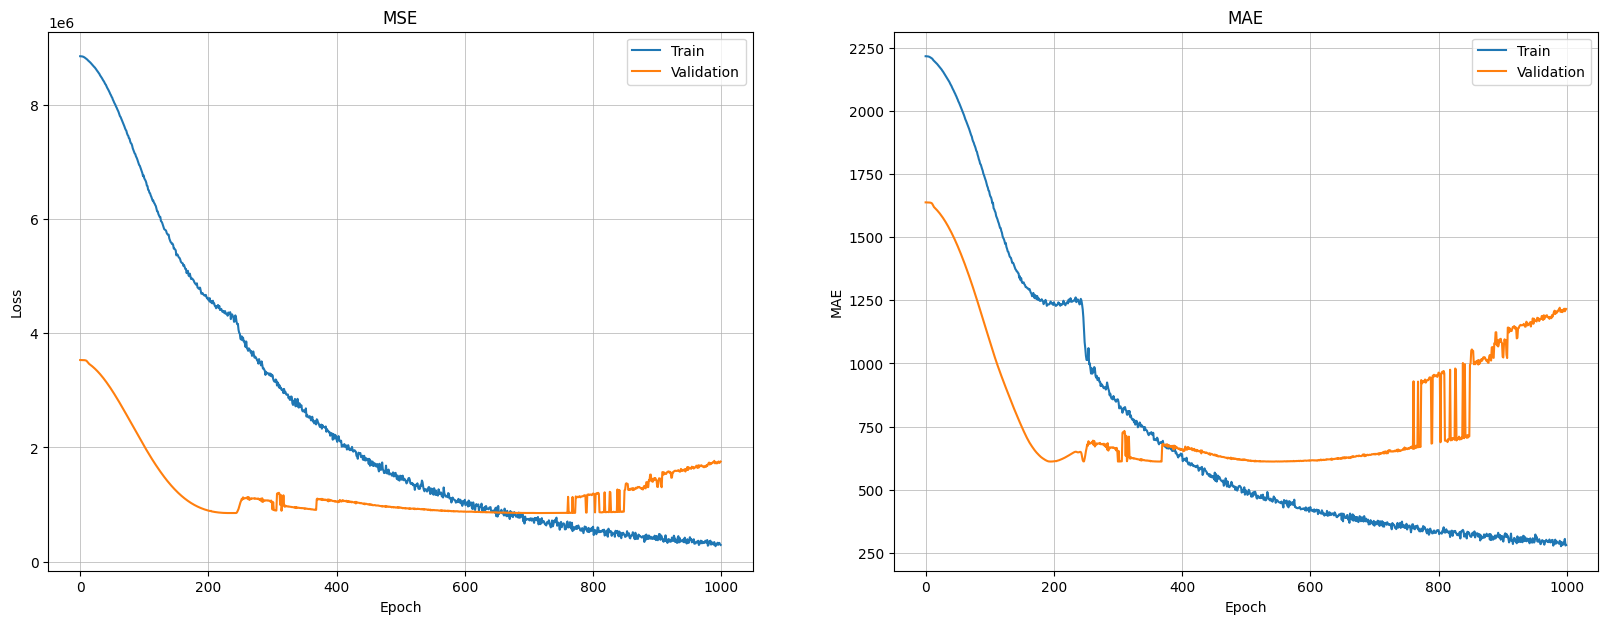

In [88]:
plot_history(history)